# Proyek 2: Prediksi Harga Rumah Menggunakan Neural Network

## Deskripsi Proyek

Dalam proyek ini, kita akan menggunakan dataset California Housing yang berisi informasi tentang rumah di California, seperti ukuran rumha, jumlah kamar tidur, lokasi, dan harga rumah. Model yang akan dibangun adalah model regresi untuk memprediksi harga rumah berdasarkan fitur-fitur tersebut.

## Langkah-langkah Proyek

### 1. Mengunduh Dataset

Dataset California Housing dapat diunduh dari sklearn.datasets. Dataset ini berisi data rumah dengan 8 fitur dan harga rumah sebagai target.

### 2. Persiapan Data

- Dataset akan dibagi menjadi data pelatihan dan data pengujian.
- Melakukan normalisasi pada data agar model dapat bekerja lebih baik dengan input yang terstandariasi.

### 3. Membangun Model Neural Network

- Model Neural Network terdiri dari beberapa layer Dense (fully connected) untuk melakukan regresi.
- Fungsi aktivasi ReLU digunakan di layer tersembunyi, dan linear activation digunakan untuk output layer untuk regresi.

### 4. Melatih Model

- Gunakan mean squared error (MSE) sebagai fungsi loss untuk masalah regresi.
- Optimizer Adam digunakan untuk pembaruan weights selama pelatihan.

### 5. Evaluasi Model

Evaluasi kinerja model menggunakan data pengujian dan mengukur keaslahan prediksi menggunakan Mean Absolute Error (MAE) atau Mean Squared Error (MSE).

### 6. Prediksi dan Visualisasi

Setelah model dilatih, prediksi harga rumah dapat dilakukan untuk data pengujian, dan hasilnya dibandingkan dengan nilai asli.

In [1]:
%pip install tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


Epoch 1/50


c:\Users\anfiniti\Codes\anfipy\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.6180 - val_loss: 0.4236
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3994 - val_loss: 0.3823
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3704 - val_loss: 0.3517
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3449 - val_loss: 0.3384
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3696 - val_loss: 0.3267
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3086 - val_loss: 0.3148
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3068 - val_loss: 0.3176
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2949 - val_loss: 0.3125
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3064 - val_loss: 0.3074
Epoch 10/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3102 - val_loss: 0.3000
Epoch 11/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3065 - val_loss: 0.3186
Epoch 12/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.

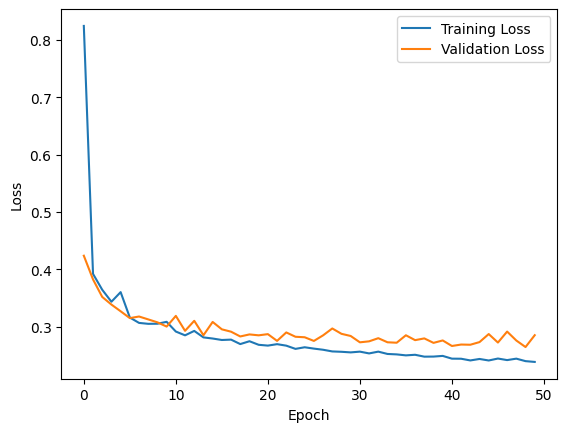

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Membuat Dataset California Housing
data = fetch_california_housing()
X = data.data # Fitur
y = data.target # Target (harga rumah)

# 2. Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalisasi data (standarisasi)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Membangun Model Neural Network
model = models.Sequential()

# Layer tersembunyi pertama
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Layer tersemebunyi kedua
model.add(layers.Dense(64, activation='relu'))

# Output layer untuk regresi (fungsi aktivasi linear)
model.add(layers.Dense(1))

# 5. Menyusun Model
model.compile(optimizer='adam', loss='mean_squared_error')

# 6. Melatih Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# 7. Evaluasi Model
test_loss = model.evaluate(X_test, y_test)
print(f'Test loss (MSE): {test_loss:.4f}')

# 8. Visualisasi Hasil Pelatihan
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
# 9. Prediksi Harga Rumah untuk Data Pengujian
y_pred = model.predict(X_test)

# Menampilkan beberapa prediksi dan nilai asli
for i in range(10):
    print(f"Predicted: {y_pred[i][0]:.2f}, Actual: {y_test[i]:.2f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step
Predicted: 0.32, Actual: 0.48
Predicted: 1.03, Actual: 0.46
Predicted: 5.01, Actual: 5.00
Predicted: 2.41, Actual: 2.19
Predicted: 2.52, Actual: 2.78
Predicted: 1.49, Actual: 1.59
Predicted: 2.22, Actual: 1.98
Predicted: 1.48, Actual: 1.57
Predicted: 2.73, Actual: 3.40
Predicted: 4.35, Actual: 4.47


In [11]:
import pandas as pd

# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

# Display the first few rows of the DataFrame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Penjelasan Kode

### 1. Memuat dan mempersiapkan data

- Dataset California Housing diambil menggunakan fetch_california_housing dari sklearn.datasets.
- Data dibagi menjadi data pelatihan dan data pengujian menggunakan train_test_split.
- Data distandarisasi menggunakan StandardScaler agar model dapat lebih cepat konvergen.

### 2. Membangun Model Neural Network

- Model menggunakan dua Dense Layers dengan ReLU sebagai fungsi aktivasi di layer tersembunyi.
- Pada output layer, digunakan fungsi aktivasi linear karena ini adalah masalah regresi (prediksi nilai kontinu).

### 3. Melatih Model

- Model dilatih menggunakan mean squared error (MSE) sebagai fungsi loss yang umum untuk masalah regresi.
- Optimizer Adam digunakan untuk memperbarui weights.

### 4. Evaluasi dan visualisasi

- Setelah pelatihan, model dievaluasi pada data pengujian untuk menghitung MSE.
- Grafik loss selama pelatihan ditampilkan untuk menunjukkan apakah model mengalami overfitting atau tidak.

### 5. Prediksi

Model digunakan untuk memprediksi harga rumah berdasarkan data pengujian dan hasilnya dibandingkan dengan nilai asli

## Output

- Grafik Loss: Menampilkan perubahan nilai loss selama pelatihan dan validasi.
- Prediksi dan Nilai Asli: Prediksi harga rumah akan dicetak bersama dengan nilai harga rumah yang sebenarnya untuk beberapa data pengujian.

## Tujuan Proyek

- Mempelajari konsep regresi menggunakan neural netowrk.
- Menggunakan model untuk prediksi harga rumah berdasarkan berbagai fitur.
- Mengevaluasi kinerja model regresi danmemahami cara mengoptimalkan model menggunakan deep learning.

Proyek ini memberikan gambaran tentang cara membangun model deep learning untuk masalah regresi menggunakan dataset tabular, yang sering ditemui dalam aplikasi dunia nyata.